In [67]:
import numpy as np
import pandas as pd
import os, sys
import plotly.express as px

import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import zscore

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Load data
df = pd.read_csv('../data/raw/parkinsons.data')
df.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
63,phon_R01_S17_4,228.832,234.619,223.634,0.00296,0.00001,0.00175,0.00155,0.00526,0.01644,...,0.02647,0.00351,25.964,0,0.256570,0.683296,-7.245620,0.018689,2.498224,0.093534
169,phon_R01_S42_5,240.301,245.135,219.783,0.00517,0.00002,0.00316,0.00283,0.00949,0.02018,...,0.03529,0.00965,21.020,0,0.371837,0.646167,-7.169701,0.073298,2.266432,0.100881
86,phon_R01_S21_3,178.222,202.450,141.047,0.00321,0.00002,0.00163,0.00194,0.00488,0.03759,...,0.06219,0.03151,15.924,1,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614
40,phon_R01_S08_5,186.163,197.724,177.584,0.00298,0.00002,0.00165,0.00175,0.00496,0.01495,...,0.02321,0.00231,26.822,1,0.326480,0.765623,-6.647379,0.201095,2.374073,0.130554
155,phon_R01_S37_3,117.870,127.349,95.654,0.00647,0.00005,0.00356,0.00300,0.01067,0.03087,...,0.04977,0.02631,22.431,1,0.628300,0.652025,-3.583722,0.207914,2.439597,0.206256


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [70]:
df.isnull().sum().sum()

0

In [71]:
for i in df.columns:
    print(i, len(df[df[i] == 0]))

name 0
MDVP:Fo(Hz) 0
MDVP:Fhi(Hz) 0
MDVP:Flo(Hz) 0
MDVP:Jitter(%) 0
MDVP:Jitter(Abs) 0
MDVP:RAP 0
MDVP:PPQ 0
Jitter:DDP 0
MDVP:Shimmer 0
MDVP:Shimmer(dB) 0
Shimmer:APQ3 0
Shimmer:APQ5 0
MDVP:APQ 0
Shimmer:DDA 0
NHR 0
HNR 0
status 48
RPDE 0
DFA 0
spread1 0
spread2 0
D2 0
PPE 0


In [72]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [73]:
fig = px.pie(df["status"].value_counts().reset_index(), names='index', values='status')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Status Distribution', title_x=0.5)
fig.update(layout_showlegend=False)
fig.show()

[Text(0, 0, '48'), Text(0, 0, '147')]

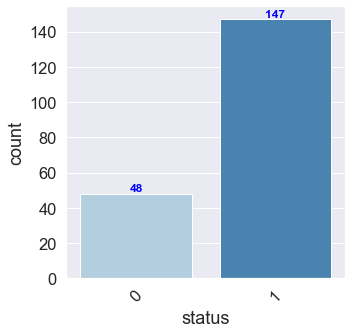

In [74]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df.status,
                   palette='Blues',
                   data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold', color='blue')

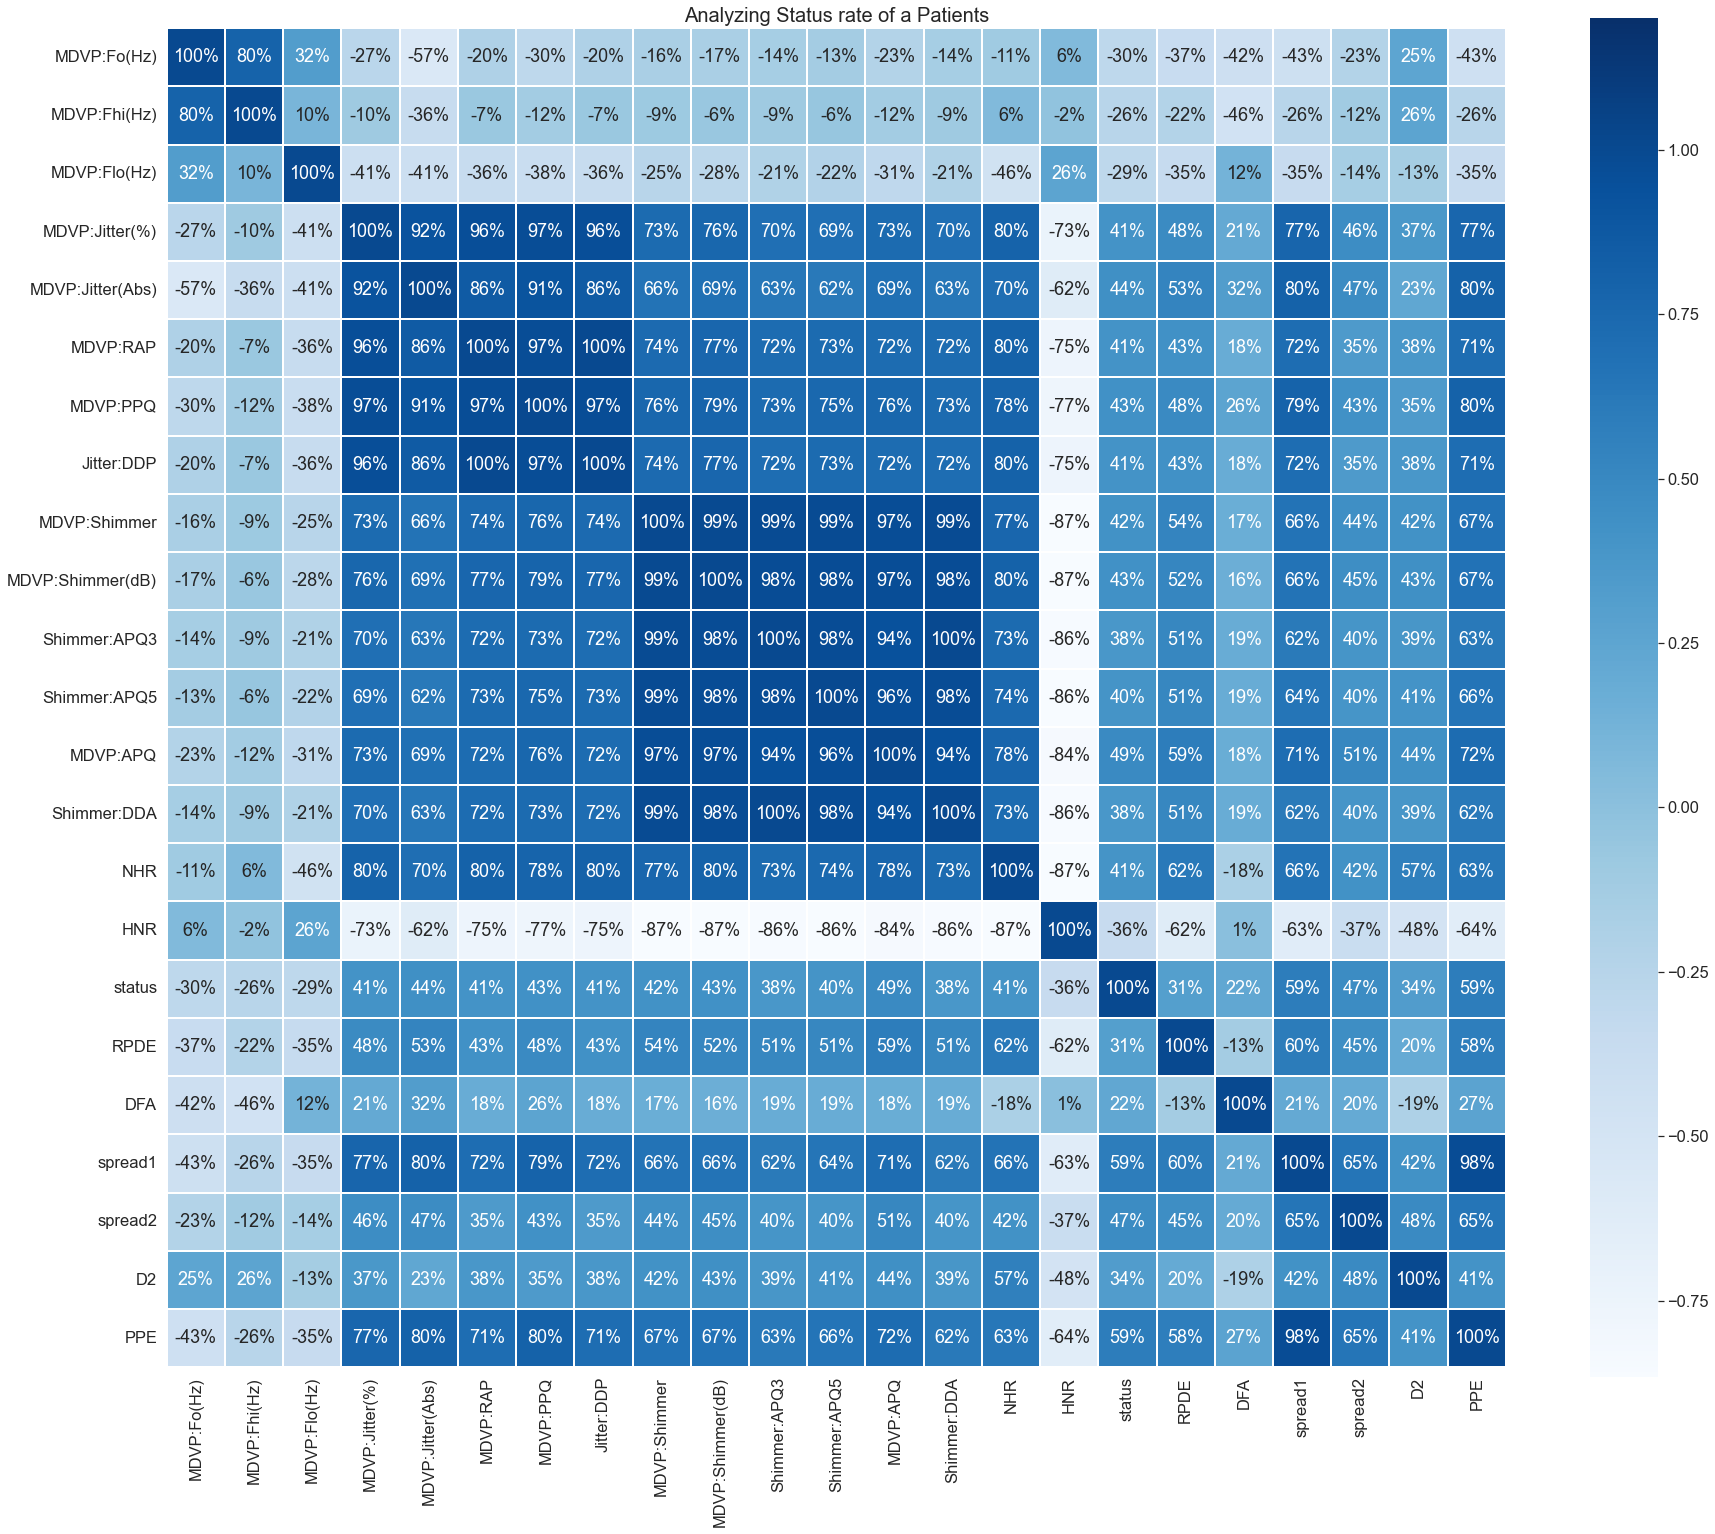

In [75]:
# plot correlation matrix
plt.figure(figsize=(30, 25))
sns.set(font_scale=1.5)
plt.title('Analyzing Status rate of a Patients', fontsize=20)
sns.heatmap(df.corr("spearman"), vmax=1.2, annot=True, square='square', fmt='.0%', linewidths=2, cmap='Blues')
plt.show()

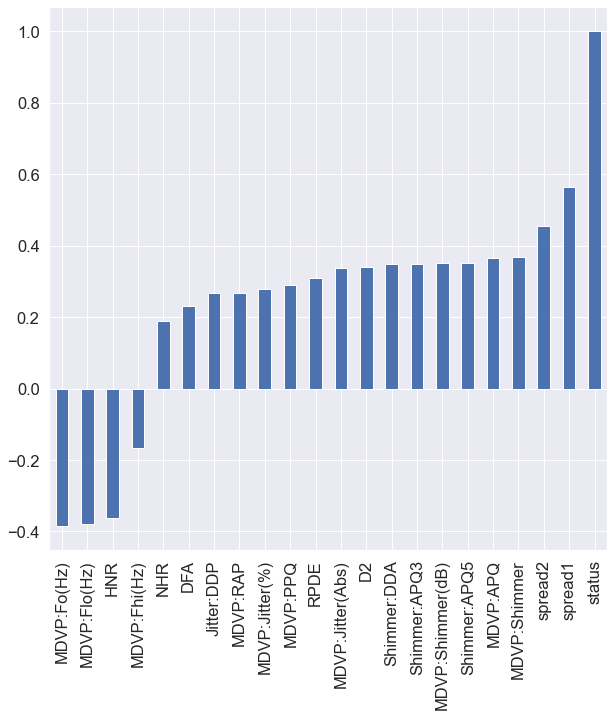

In [76]:
plt.figure(figsize=(10, 10))
df.corr()['status'][:-1].sort_values().plot(kind='bar')
plt.show()

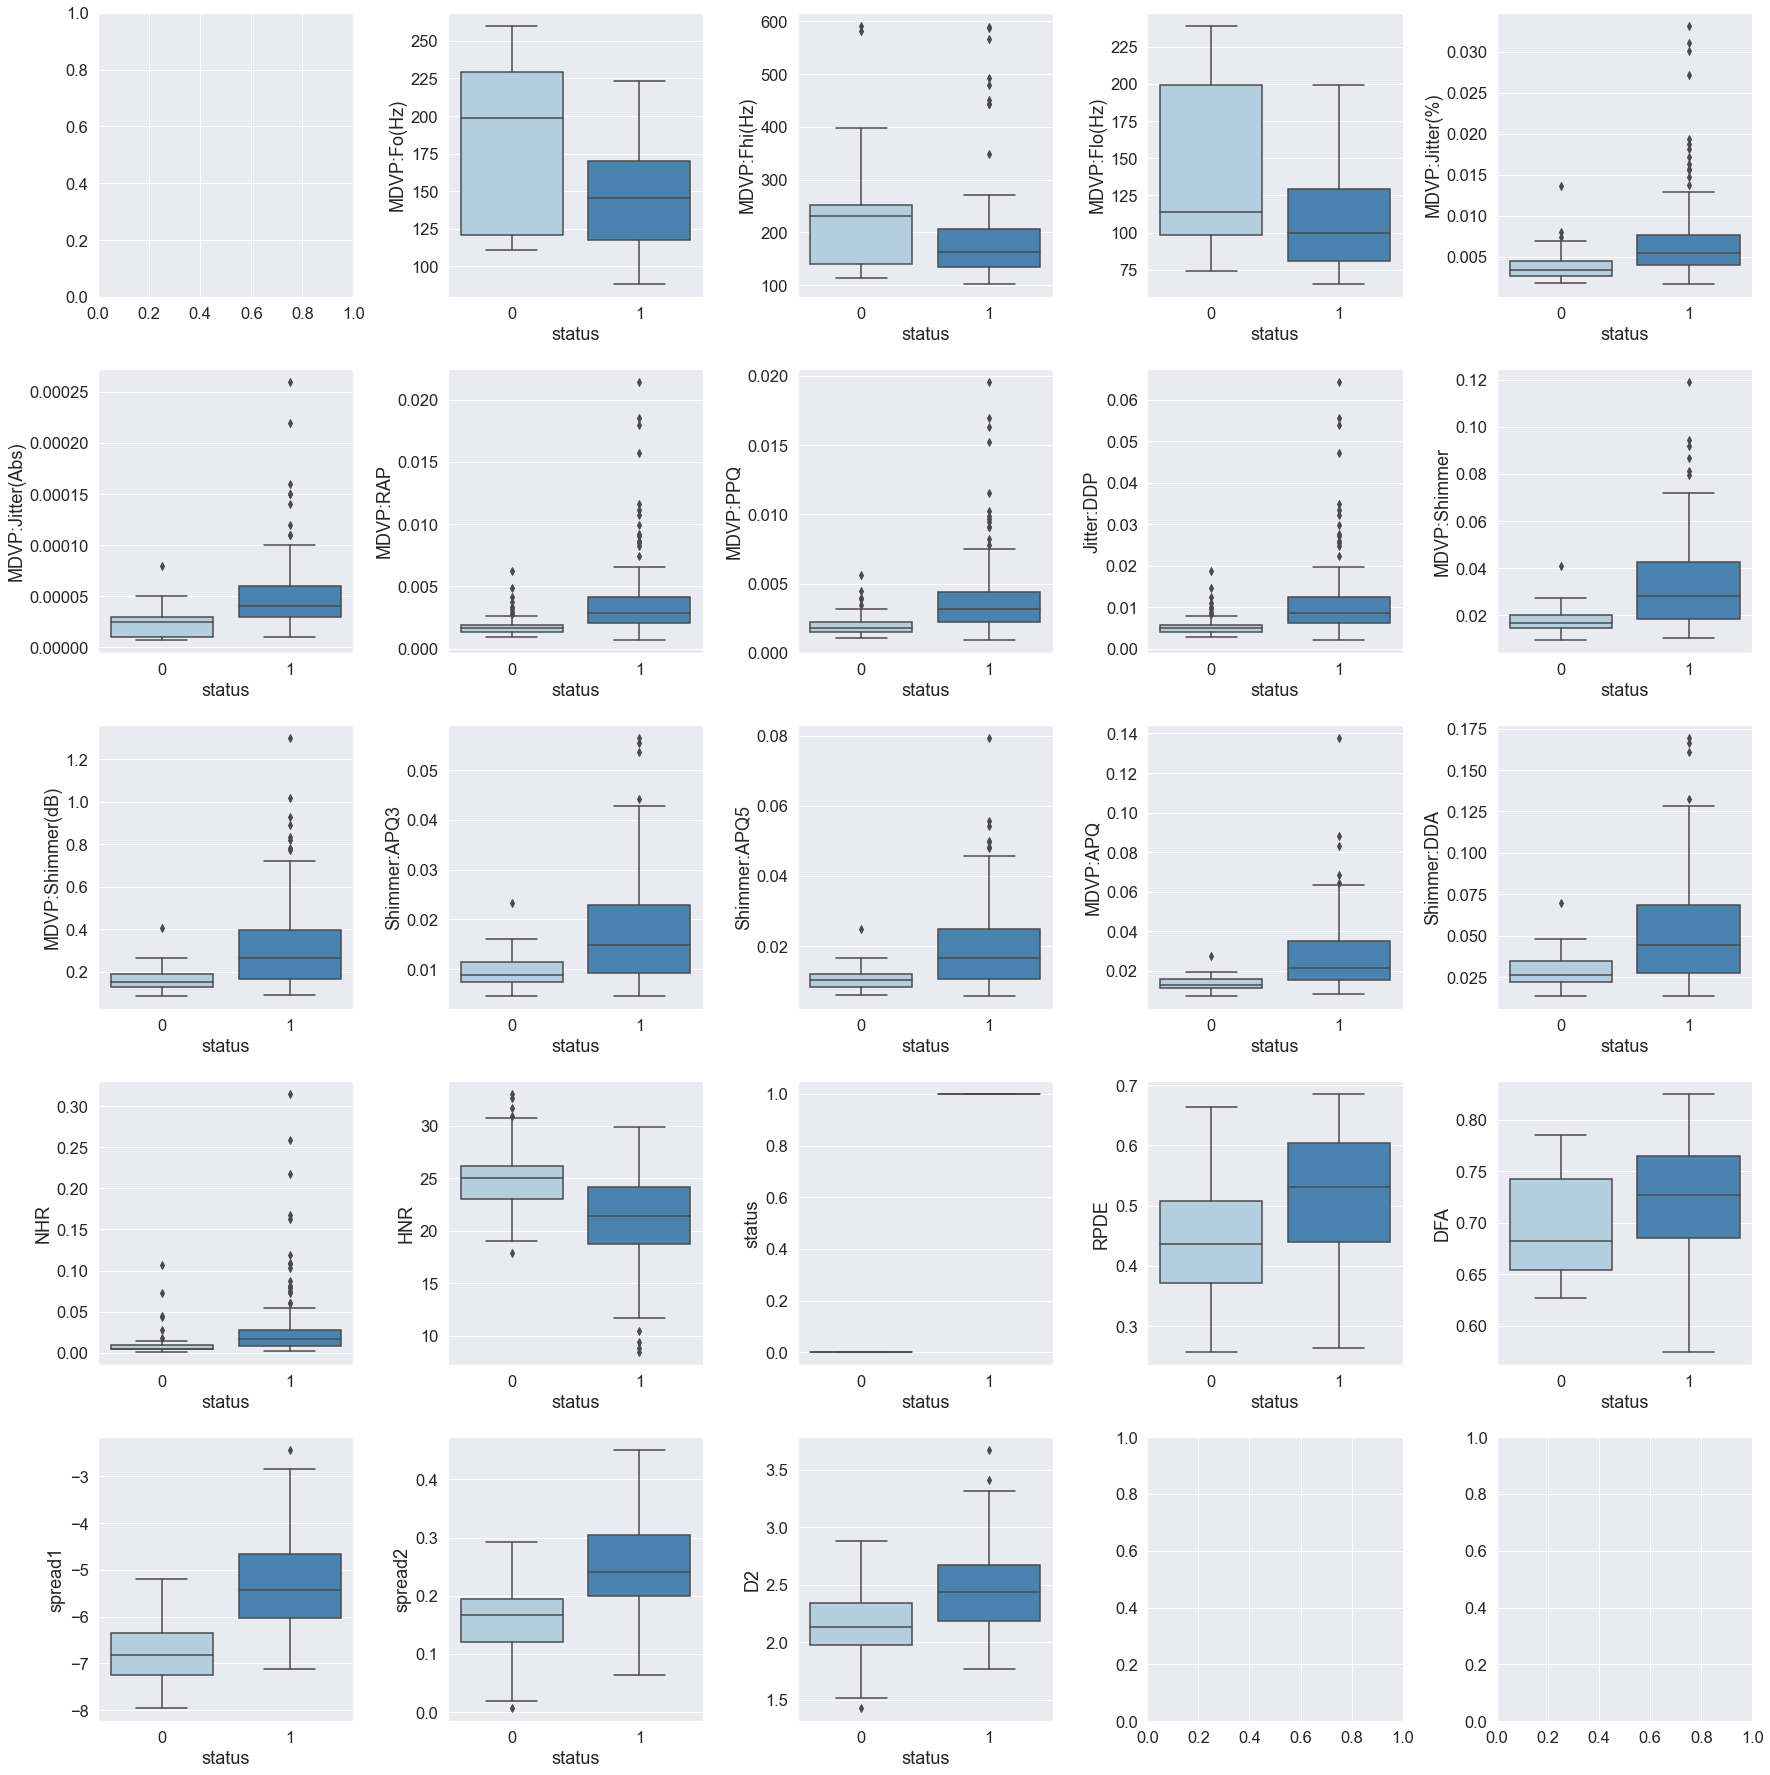

In [77]:
fig, axes = plt.subplots(5, 5, figsize=(25, 25))
axes = axes.flatten()

for i in range(1, len(df.columns) - 1):
    sns.boxplot(x='status', y=df.iloc[:, i], data=df, orient='v', ax=axes[i], palette='Blues')
plt.tight_layout()
plt.show()

**There are many outliers in the data**

# preprocess data

In [87]:
X = df.drop(columns=['status', 'name'], axis=1)  # Note : dropping column axis = 1; dropping row then axis = 0
y = df['status']

In [88]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [89]:
# split data into train and test
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [90]:
# random oversampling to handle imbalanced data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_org, y_train_org)

In [91]:
y_resampled

0      0
1      1
2      1
3      0
4      1
      ..
231    0
232    0
233    0
234    0
235    0
Name: status, Length: 236, dtype: int64

In [92]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=y_resampled,
                   palette='Blues',
                   data=X_resampled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.bar_label(ax.containers[0], fontsize=12, fontweight='bold', color='blue')

AttributeError: 'numpy.ndarray' object has no attribute 'get'

<Figure size 360x360 with 0 Axes>

In [114]:
def model_evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('f1 score = {:0.2f}%.'.format(f1_score))

    print('\nClassification Report:\n')
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------\n")

    fig, ax = plt.subplots(figsize=(7, 7))
    print('\nConfusion Matrix:')
    plot_confusion_matrix(model, X_test, y_test,
                          xticks_rotation='horizontal',
                          ax=ax, cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.show()

    return

In [95]:
def tuneParams(model, X_train, y_train, param_grid):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

**KNN**

In [115]:
knn_params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}
knn = KNeighborsClassifier()
knn_model, knn_params, knn_score = tuneParams(knn,X_resampled, y_resampled, knn_params)
print('\nKNN Model:', knn_model)
print('Best Parameters:', knn_params)
print('Best Score:', knn_score)


KNN Model: KNeighborsClassifier(n_neighbors=1)
Best Parameters: {'n_neighbors': 1}
Best Score: 0.9591787439613526


Model Performance
Accuracy = 0.97%.
f1 score = 0.98%.

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

---------------------------------------------


Confusion Matrix:


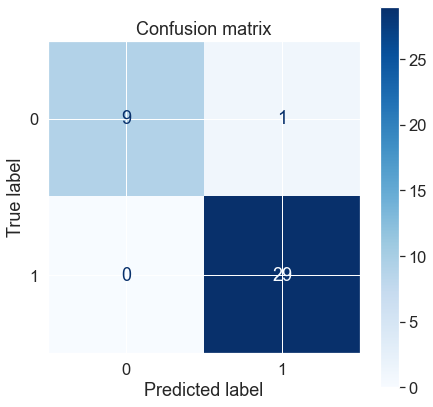

In [116]:
# knn
knn = KNeighborsClassifier(algorithm='brute', metric='minkowski', n_neighbors=1, p=2)
knn.fit(X_resampled, y_resampled)
model_evaluation(knn, X_test_org, y_test_org)

In [117]:
# cross validation prediction
cv_pred = cross_val_predict(knn, X_resampled, y_resampled, cv=5)
knn_acc = accuracy_score(y_resampled, cv_pred)
print('Cross Validation Accuracy:', knn_acc)
knn_f1 = metrics.f1_score(y_resampled, cv_pred)
print('Cross Validation F1 Score:', knn_f1)

Cross Validation Accuracy: 0.9661016949152542
Cross Validation F1 Score: 0.9649122807017544


**Logistic Regression**

In [103]:
logr_parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression(random_state=0)
logreg_model, logreg_params, logreg_score = tuneParams(logreg, X_resampled, y_resampled, logr_parameters)

print('\nLogisticRegression Model:', logreg_model)
print('Best Parameters:', logreg_params)
print('Best Score:', logreg_score)



LogisticRegression Model: LogisticRegression(C=100.0, random_state=0, solver='newton-cg')
Best Parameters: {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.844867149758454


Model Performance
Accuracy = 0.85%.
f1 score = 0.89%.

Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.93      0.86      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.86      0.85      0.85        39

---------------------------------------------


Confusion Matrix:


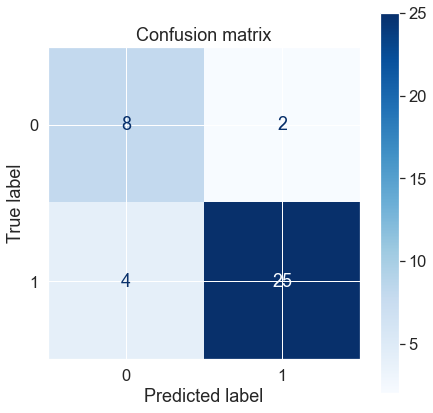

In [118]:
# logistic regression
logreg = LogisticRegression(C=100.0, penalty='l1', random_state=0, solver='liblinear')
logreg.fit(X_resampled, y_resampled)
model_evaluation(logreg, X_test_org, y_test_org)

In [119]:
# cross validation prediction
cv_pred = cross_val_predict(logreg, X_resampled, y_resampled, cv=5)
logreg_acc = accuracy_score(y_resampled, cv_pred)
print('Cross Validation Accuracy:', logreg_acc)
logreg_f1 = metrics.f1_score(y_resampled, cv_pred)
print('Cross Validation F1 Score:', logreg_f1)

Cross Validation Accuracy: 0.8347457627118644
Cross Validation F1 Score: 0.8354430379746834


In [106]:
tree_parameter = {
    'random_state': [0],
    'max_depth': range(2, 10, 1),
    'min_samples_split': range(2, 10, 1),
    'min_samples_leaf': range(2, 10, 1),
    'max_features': ['auto', 'sqrt', 'log2']
}
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                              criterion='gini', max_depth=None,
                              max_features=None,
                              max_leaf_nodes=None,
                              min_impurity_decrease=0.0,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              min_weight_fraction_leaf=0.0,
                              random_state=1024,
                              splitter='best')
tree_model, tree_params, tree_score = tuneParams(tree, X_resampled, y_resampled, tree_parameter)
print('\nDecisionTreeClassifier Model:', tree_model)
print('Best Parameters:', tree_params)
print('Best Score:', tree_score)


DecisionTreeClassifier Model: DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_leaf=2,
                       random_state=0)
Best Parameters: {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}
Best Score: 0.925


Model Performance
Accuracy = 0.69%.
f1 score = 0.78%.

Classification Report:

              precision    recall  f1-score   support

           0       0.43      0.60      0.50        10
           1       0.84      0.72      0.78        29

    accuracy                           0.69        39
   macro avg       0.63      0.66      0.64        39
weighted avg       0.73      0.69      0.71        39

---------------------------------------------


Confusion Matrix:


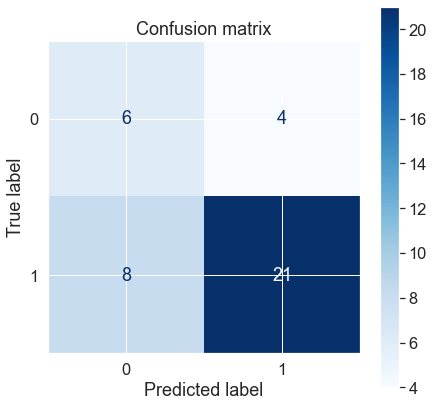

In [120]:
# decision tree
tree = DecisionTreeClassifier(max_depth=7, max_features='auto', min_samples_leaf=3, random_state=0)
tree.fit(X_resampled, y_resampled)
model_evaluation(tree, X_test_org, y_test_org)

In [121]:
# cross validation prediction
cv_pred = cross_val_predict(tree, X_resampled, y_resampled, cv=5)
tree_acc = accuracy_score(y_resampled, cv_pred)
print('Cross Validation Accuracy:', tree_acc)
tree_f1 = metrics.f1_score(y_resampled, cv_pred)
print('Cross Validation F1 Score:', tree_f1)

Cross Validation Accuracy: 0.8940677966101694
Cross Validation F1 Score: 0.8917748917748918


In [122]:
svm_parameters = {
    'random_state': [0],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.4, 0.2, 0.8],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
svm = SVC()
svm_model, svm_params, svm_score = tuneParams(svm, X_resampled, y_resampled, svm_parameters)
print('\nSVM Model:', svm_model)
print('Best Parameters:', svm_params)
print('Best Score:', svm_score)



SVM Model: SVC(C=10, gamma=0.1, random_state=0)
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 0}
Best Score: 0.9816425120772947


Model Performance
Accuracy = 0.95%.
f1 score = 0.97%.

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39

---------------------------------------------


Confusion Matrix:


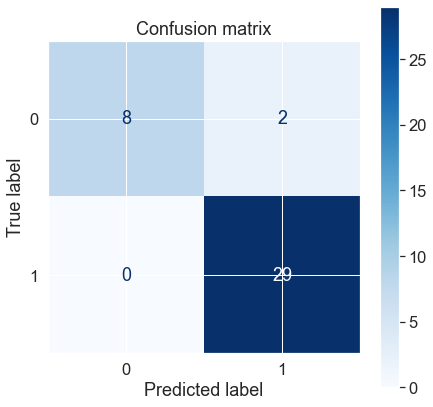

In [123]:
# svm
svm = SVC(kernel='rbf', gamma=0.4, C=1, random_state=0, probability=True)
svm.fit(X_resampled, y_resampled)
model_evaluation(svm, X_test_org, y_test_org)

In [124]:
# cross validation prediction
cv_pred = cross_val_predict(svm, X_resampled, y_resampled, cv=5)
svm_acc = accuracy_score(y_resampled, cv_pred)
print('Cross Validation Accuracy:', svm_acc)
svm_f1 = metrics.f1_score(y_resampled, cv_pred)
print('Cross Validation F1 Score:', svm_f1)

Cross Validation Accuracy: 0.9872881355932204
Cross Validation F1 Score: 0.9872340425531915


In [188]:
AdaBoost_param = {
    'random_state': [42],
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
ada = AdaBoostClassifier()
ada_model, ada_params, ada_score = tuneParams(ada, X_resampled, y_resampled, AdaBoost_param)
print('\nAdaBoost Model:', ada_model)
print('Best Parameters:', ada_params)
print('Best Score:', ada_score)



AdaBoost Model: AdaBoostClassifier(learning_rate=0.1, n_estimators=180, random_state=42)
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 180, 'random_state': 42}
Best Score: 0.946014492753623


Model Performance
Accuracy = 0.87%.
f1 score = 0.91%.

Classification Report:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.83      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.91      0.85        39
weighted avg       0.91      0.87      0.88        39

---------------------------------------------


Confusion Matrix:


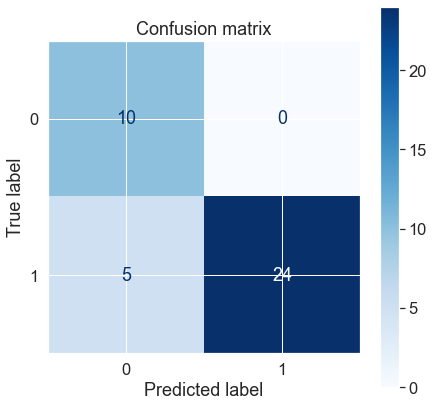

In [125]:
# Adaboost
ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=180, random_state=42)
ada.fit(X_resampled, y_resampled)
model_evaluation(ada, X_test_org, y_test_org)

In [126]:
# cross validation prediction
cv_pred = cross_val_predict(ada, X_resampled, y_resampled, cv=5)
ada_acc = accuracy_score(y_resampled, cv_pred)
print('Cross Validation Accuracy:', ada_acc)
ada_f1 = metrics.f1_score(y_resampled, cv_pred)
print('Cross Validation F1 Score:', ada_f1)

Cross Validation Accuracy: 0.9449152542372882
Cross Validation F1 Score: 0.9422222222222222


In [190]:
gb_param = {
    'random_state': [42],
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
gb = GradientBoostingClassifier()
gb_model, gb_params, gb_score = tuneParams(gb, X_resampled, y_resampled, gb_param)
print('\nGradientBoosting Model:', gb_model)
print('Best Parameters:', gb_params)
print('Best Score:', gb_score)


GradientBoosting Model: GradientBoostingClassifier(n_estimators=140, random_state=42)
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 140, 'random_state': 42}
Best Score: 0.9574879227053139


Model Performance
Accuracy = 0.92%.
f1 score = 0.95%.

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39

---------------------------------------------


Confusion Matrix:


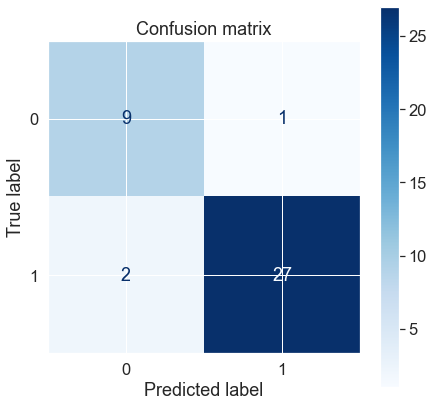

In [135]:
## Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=140, random_state=42)
gb.fit(X_resampled, y_resampled)
model_evaluation(gb, X_test_org, y_test_org)

In [136]:
# cross validation prediction
cv_pred = cross_val_predict(gb, X_resampled, y_resampled, cv=5)
gb_acc = accuracy_score(y_resampled, cv_pred)
print('Cross Validation Accuracy:', gb_acc)
gb_f1 = metrics.f1_score(y_resampled, cv_pred)
print('Cross Validation F1 Score:', gb_f1)

Cross Validation Accuracy: 0.9745762711864406
Cross Validation F1 Score: 0.9739130434782608


In [192]:
random_forest_param = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }
rf = RandomForestClassifier()
rf_model, rf_params, rf_score = tuneParams(rf, X_resampled, y_resampled, random_forest_param)
print('\nRandomForest Model:', rf_model)
print('Best Parameters:', rf_params)
print('Best Score:', rf_score)

KeyboardInterrupt: 

Model Performance
Accuracy = 0.92%.
f1 score = 0.95%.

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

---------------------------------------------


Confusion Matrix:


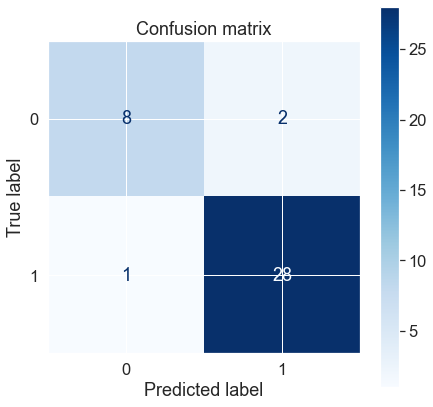

In [128]:
## Random Forest
rf = RandomForestClassifier(n_estimators=150, random_state=0)
rf.fit(X_resampled, y_resampled)
model_evaluation(rf, X_test_org, y_test_org)

In [129]:
# cross validation prediction
cv_pred = cross_val_predict(rf, X_resampled, y_resampled, cv=5)
rf_acc = accuracy_score(y_resampled, cv_pred)
print('Cross Validation Accuracy:', rf_acc)
rf_f1 = metrics.f1_score(y_resampled, cv_pred)
print('Cross Validation F1 Score:', rf_f1)

Cross Validation Accuracy: 0.9491525423728814
Cross Validation F1 Score: 0.9464285714285715


**XGBoost**

In [130]:
Xgboost_param = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
xgb = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)
xgb_model, xgb_params, xgb_score = tuneParams(xgb, X_resampled, y_resampled, Xgboost_param)
print('\nXGBoost Model:', xgb_model)
print('Best Parameters:', xgb_params)
print('Best Score:', xgb_score)

[23:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBoost Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_esti

[00:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Performance
Accuracy = 0.92%.
f1 score = 0.95%.

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

---------------------------------------------


Confusion Matrix:


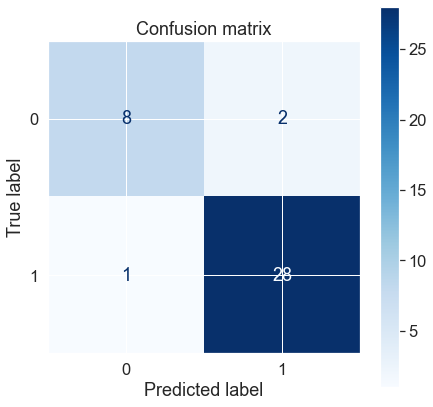

In [132]:
## XGBoost
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                    importance_type='gain', interaction_constraints='',
                    learning_rate=0.1, max_delta_step=0, max_depth=2,
                    min_child_weight=1, monotone_constraints='()',
                    n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
                    random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                    seed=42, subsample=1, tree_method='exact', validate_parameters=1,
                    verbosity=None)
xgb.fit(X_resampled, y_resampled)
model_evaluation(xgb, X_test_org, y_test_org)

In [133]:
# cross validation prediction
cv_pred = cross_val_predict(xgb, X_resampled, y_resampled, cv=5)
xgb_acc = accuracy_score(y_resampled, cv_pred)
print('Cross Validation Accuracy:', xgb_acc)
xgb_f1 = metrics.f1_score(y_resampled, cv_pred)
print('Cross Validation F1 Score:', xgb_f1)

[00:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:00:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

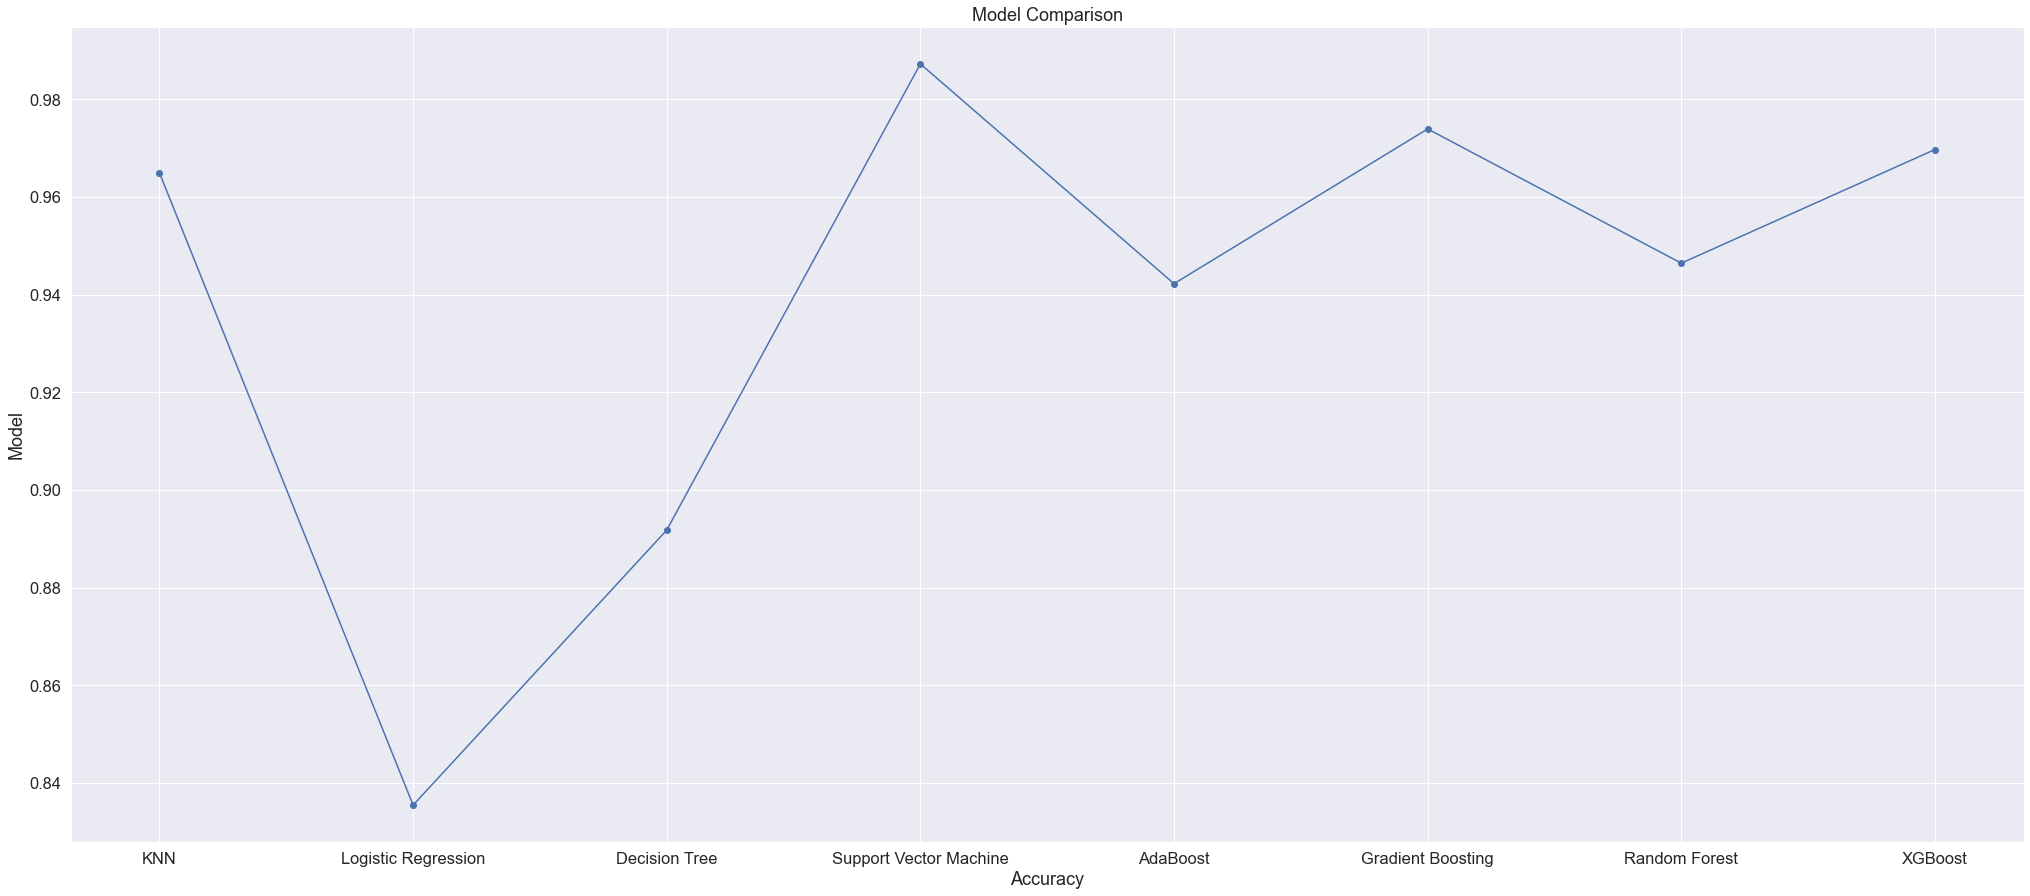

In [137]:
plt.figure(figsize=(35, 15))
plt.title('Model Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(True)
plt.plot(['KNN','Logistic Regression', 'Decision Tree','Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'Random Forest', 'XGBoost'], [knn_f1,logreg_f1,tree_f1,svm_f1,ada_f1,gb_f1,rf_f1,xgb_f1], 'o-')
plt.show()

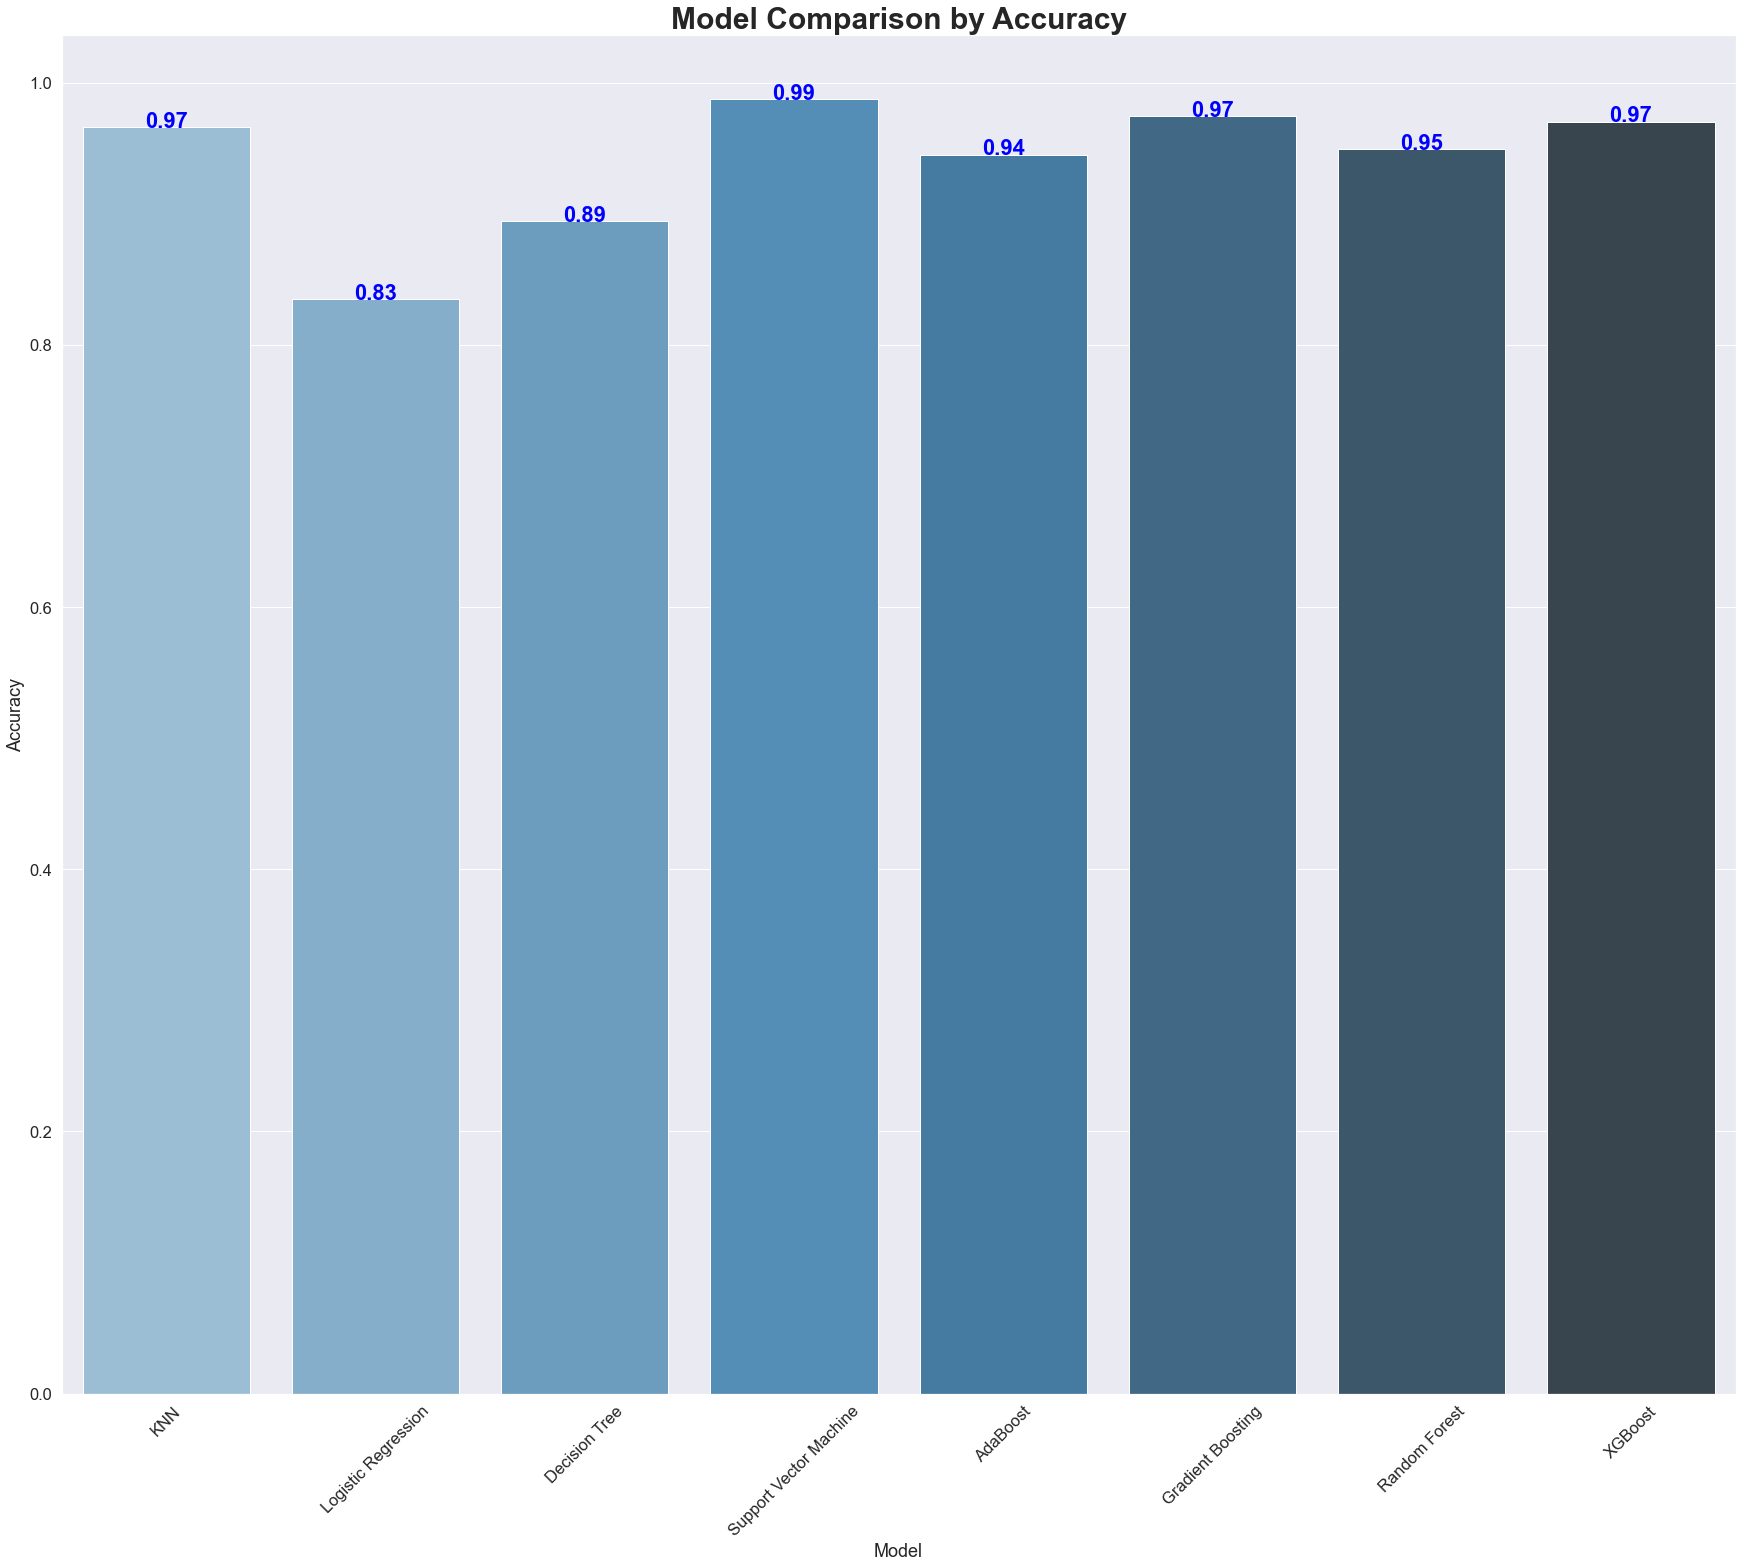

In [138]:
plt.figure(figsize=(30, 25))
plt.title('Model Comparison by Accuracy', fontsize=30, fontweight='bold')
ax=sns.barplot(x='Model', y='Accuracy', data=pd.DataFrame(data={'Model': ['KNN','Logistic Regression', 'Decision Tree','Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'Random Forest', 'XGBoost'], 'Accuracy': [knn_acc, logreg_acc, tree_acc, svm_acc, ada_acc, gb_acc, rf_acc, xgb_acc]}), palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for i, j in enumerate(ax.patches):
    ax.text(j.get_x() + j.get_width() / 2, j.get_height(), str(round(j.get_height(), 2)), ha='center', color='blue', fontweight='bold', fontsize=22)

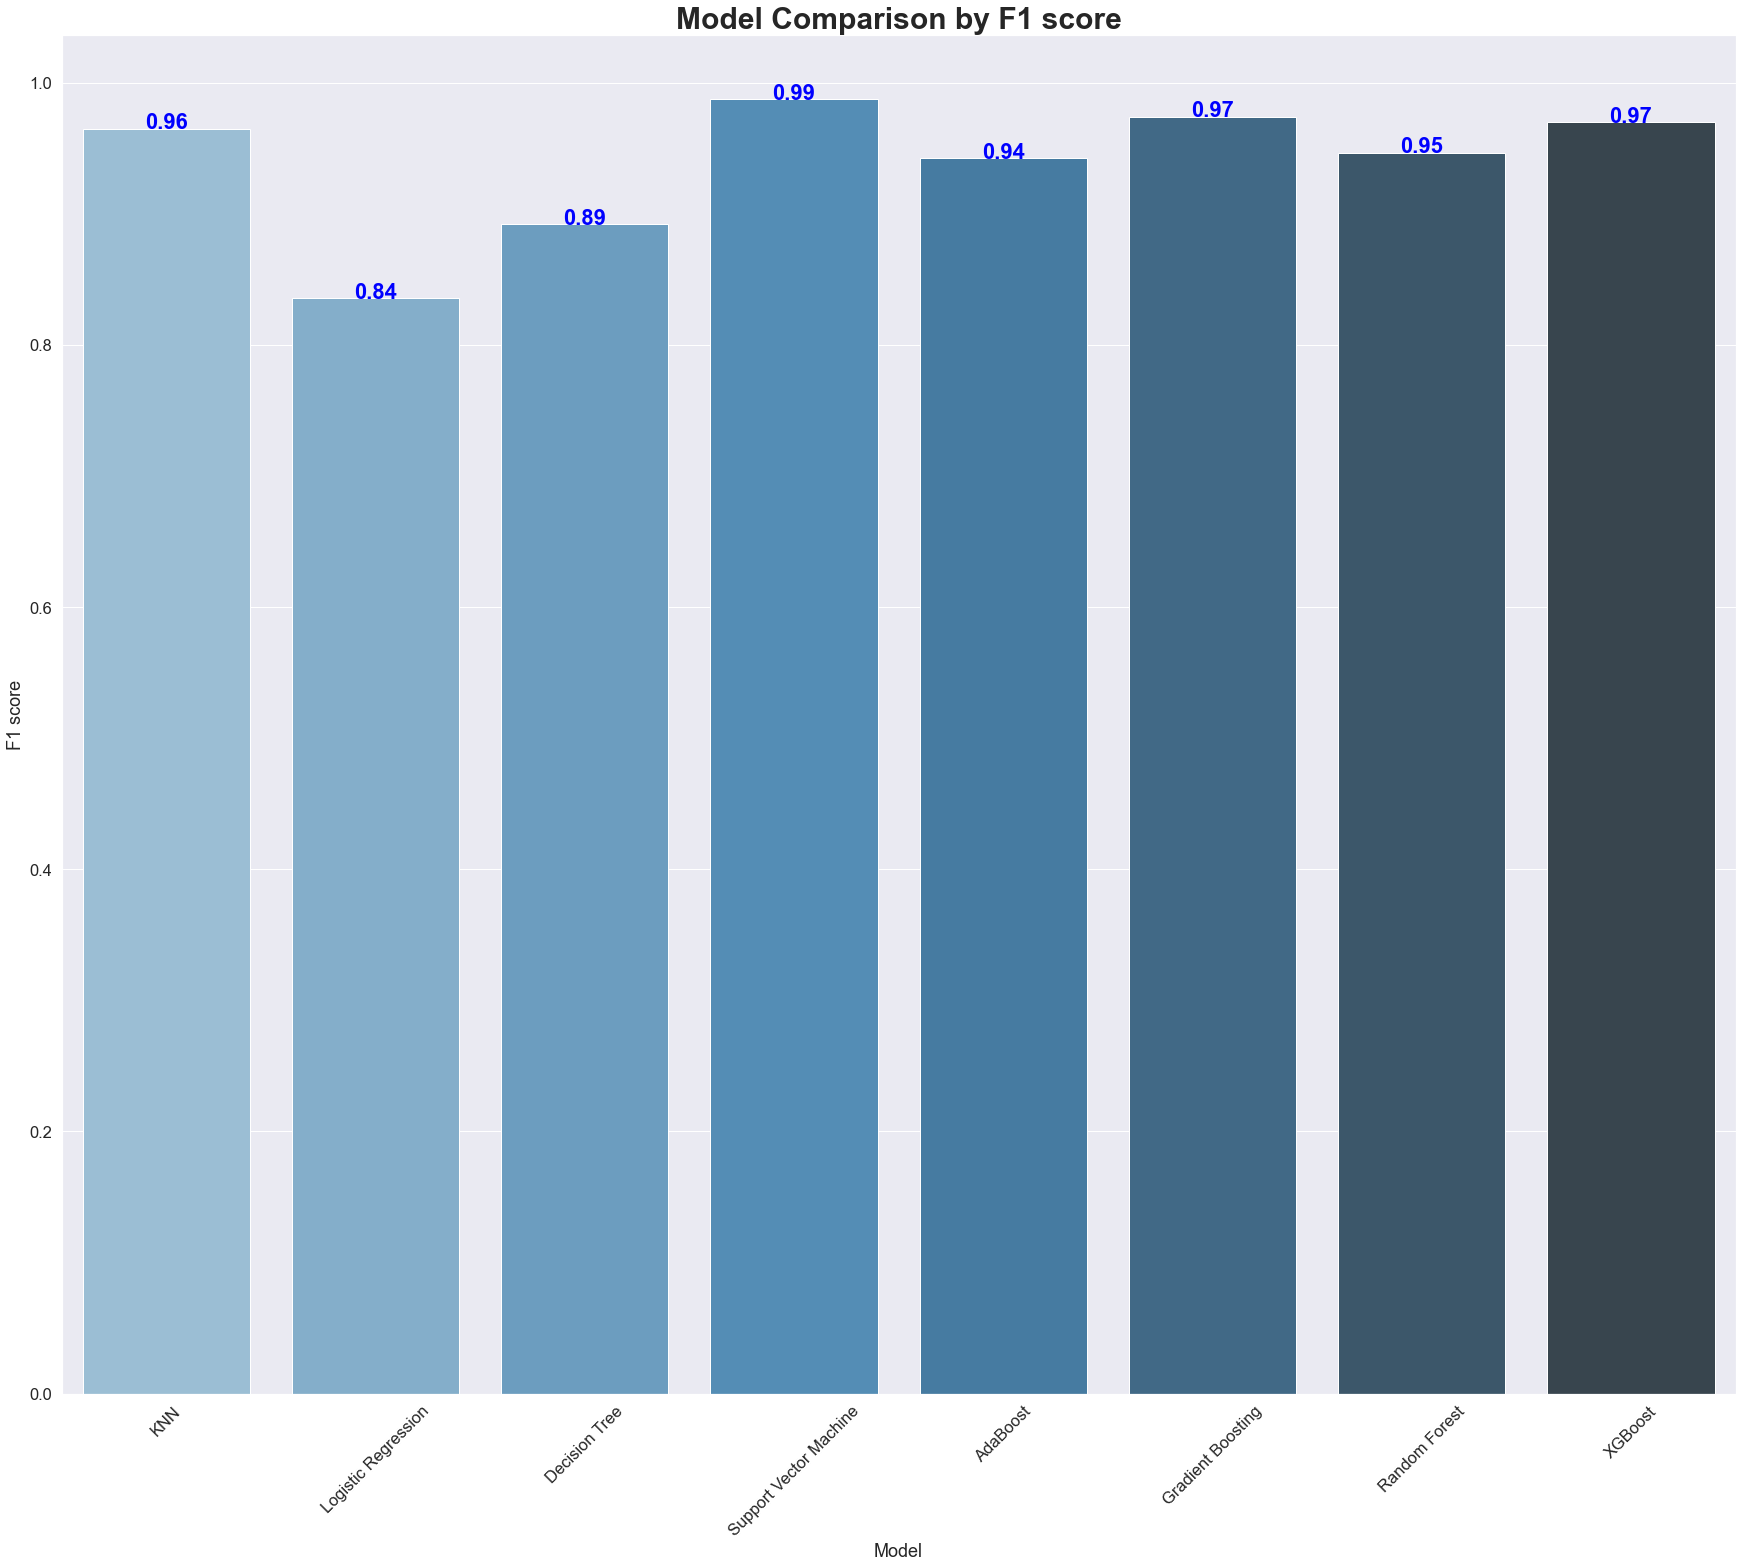

In [140]:
plt.figure(figsize=(30, 25))
plt.title('Model Comparison by F1 score', fontsize=30, fontweight='bold')
ax=sns.barplot(x='Model', y='F1 score', data=pd.DataFrame(data={'Model': ['KNN','Logistic Regression', 'Decision Tree','Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'Random Forest', 'XGBoost'], 'F1 score':[knn_f1,logreg_f1,tree_f1,svm_f1,ada_f1,gb_f1,rf_f1,xgb_f1]}), palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for i, j in enumerate(ax.patches):
    ax.text(j.get_x() + j.get_width() / 2, j.get_height(), str(round(j.get_height(), 2)), ha='center', color='blue', fontweight='bold', fontsize=22)

**The best model is SVM, it achieves about 99% f1_score**

In [141]:
from sklearn.metrics import roc_auc_score

# ROC Curve
knn_roc_auc = roc_auc_score(y_test_org, knn.predict_proba(X_test_org)[::,1])
logistic_roc_auc = roc_auc_score(y_test_org, logreg.predict_proba(X_test_org)[::,1])
tree_roc_auc = roc_auc_score(y_test_org, tree.predict_proba(X_test_org)[::,1])
svm_roc_auc = roc_auc_score(y_test_org, svm.predict_proba(X_test_org)[::,1])
ada_roc_auc = roc_auc_score(y_test_org, ada.predict_proba(X_test_org)[::,1])
gb_roc_auc = roc_auc_score(y_test_org, gb.predict_proba(X_test_org)[::,1])
rf_roc_auc = roc_auc_score(y_test_org, rf.predict_proba(X_test_org)[::,1])
xgb_roc_auc = roc_auc_score(y_test_org, xgb.predict_proba(X_test_org)[::,1])

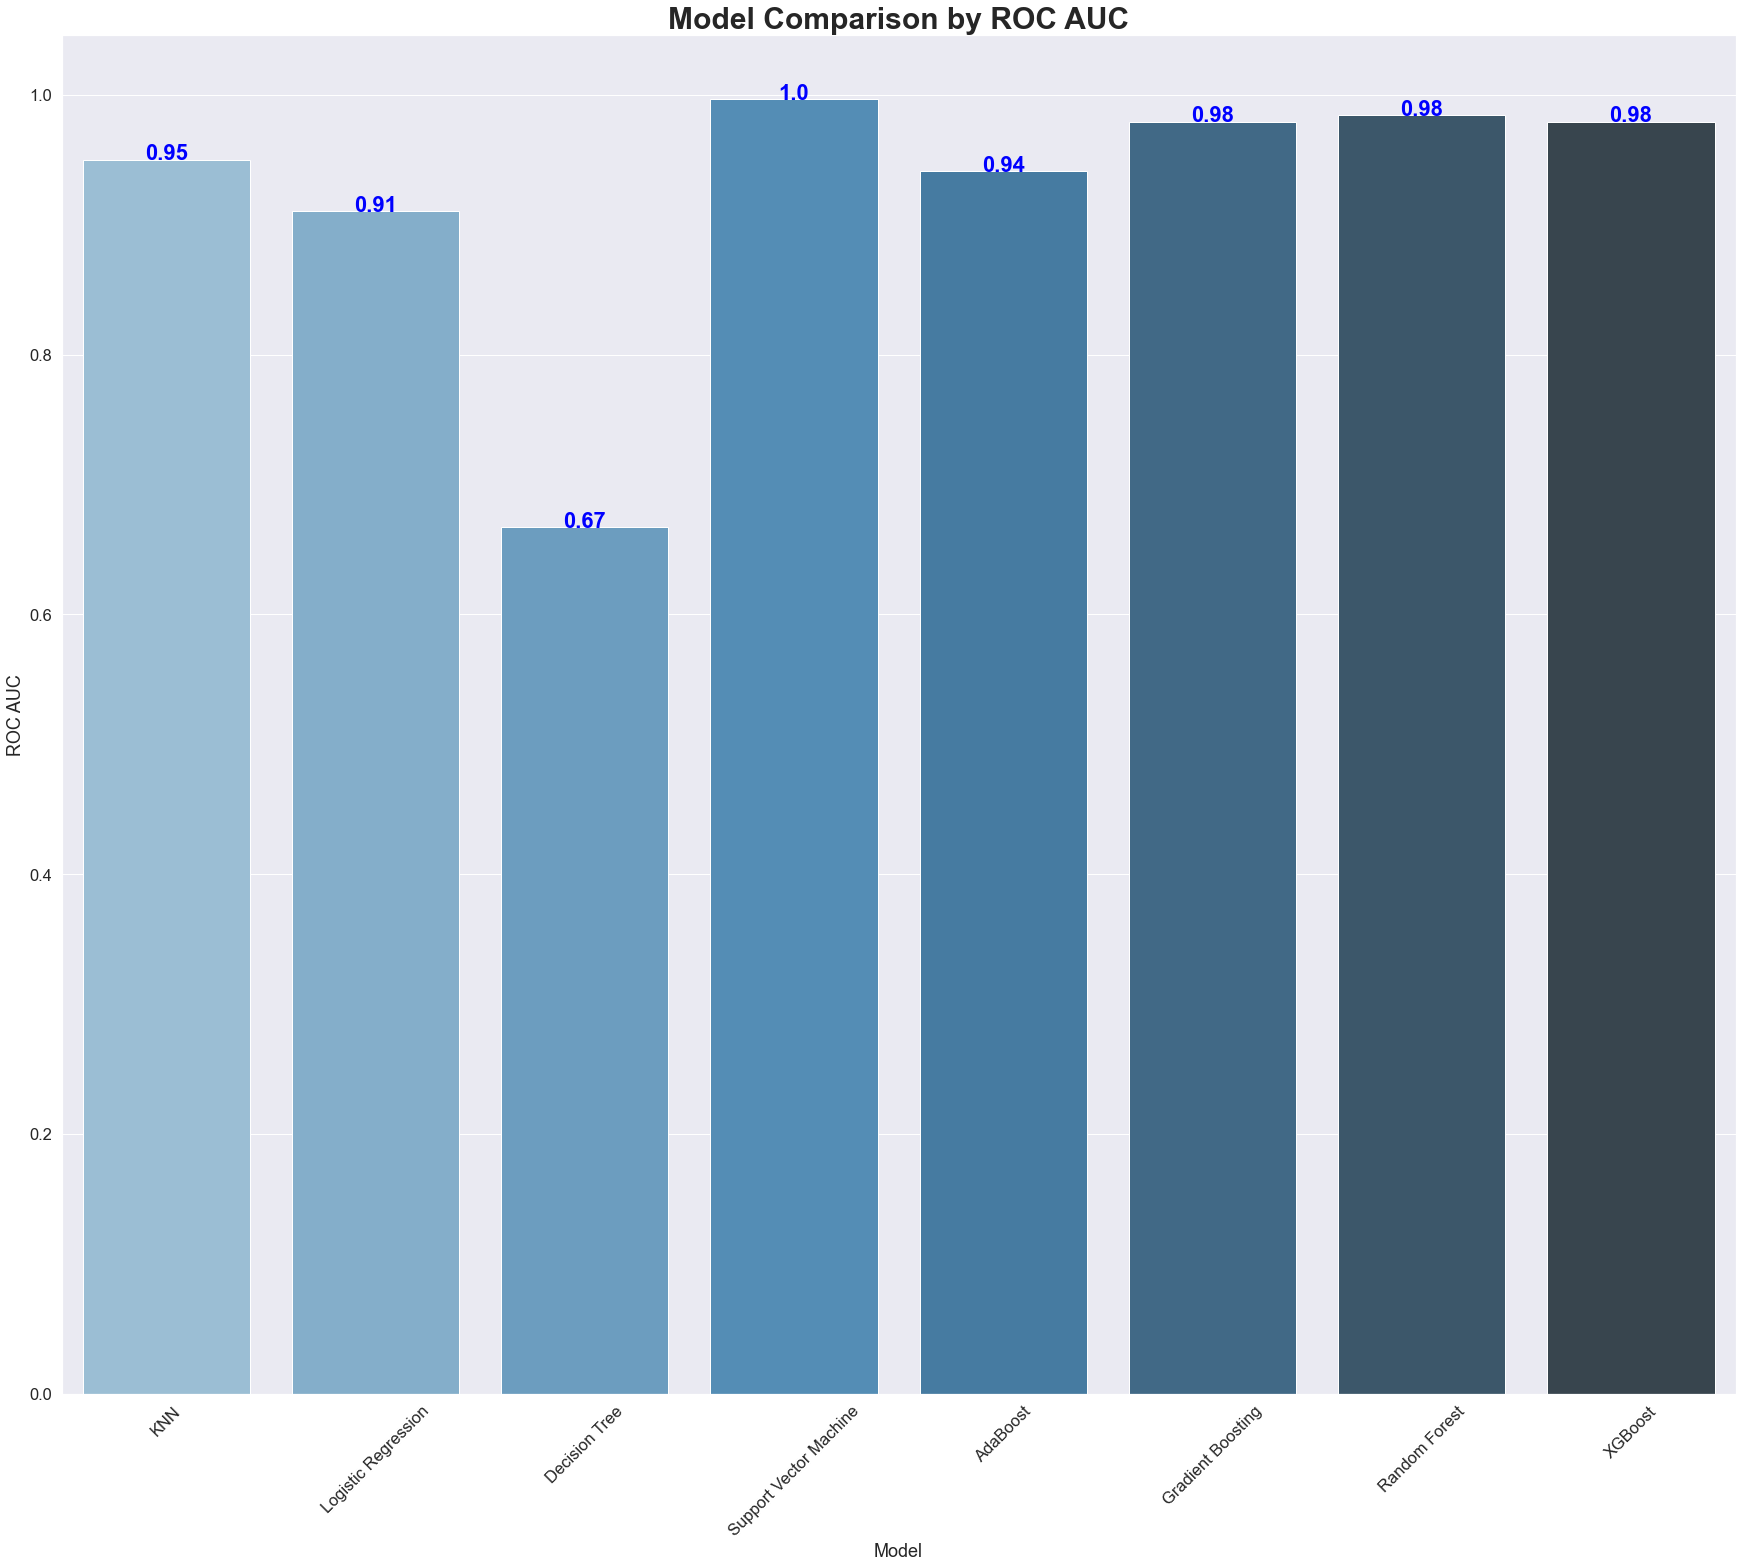

In [142]:
# ROC Curve
plt.figure(figsize=(30, 25))
plt.title('Model Comparison by ROC AUC', fontsize=30, fontweight='bold')
ax=sns.barplot(x='Model', y='ROC AUC', data=pd.DataFrame(data={'Model': ['KNN','Logistic Regression', 'Decision Tree','Support Vector Machine', 'AdaBoost', 'Gradient Boosting', 'Random Forest', 'XGBoost'], 'ROC AUC': [knn_roc_auc, logistic_roc_auc, tree_roc_auc, svm_roc_auc, ada_roc_auc, gb_roc_auc, rf_roc_auc, xgb_roc_auc]}), palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for i, j in enumerate(ax.patches):
    ax.text(j.get_x() + j.get_width() / 2, j.get_height(), str(round(j.get_height(), 2)), ha='center', color='blue', fontweight='bold', fontsize=22)

In [143]:
# saving the model
import pickle

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)
